# Model Training
### Load processed data, train models, and evaluate models

c:\Users\jlaba\anaconda3\envs\venv\lib\site-packages\nbformat\__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)
C:\Users\jlaba\AppData\Local\Temp\ipykernel_26152\3590408342.py:138: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "lxml").text
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jlaba\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\jlaba\AppData\Local\Temp\ipykernel_26152\17560909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

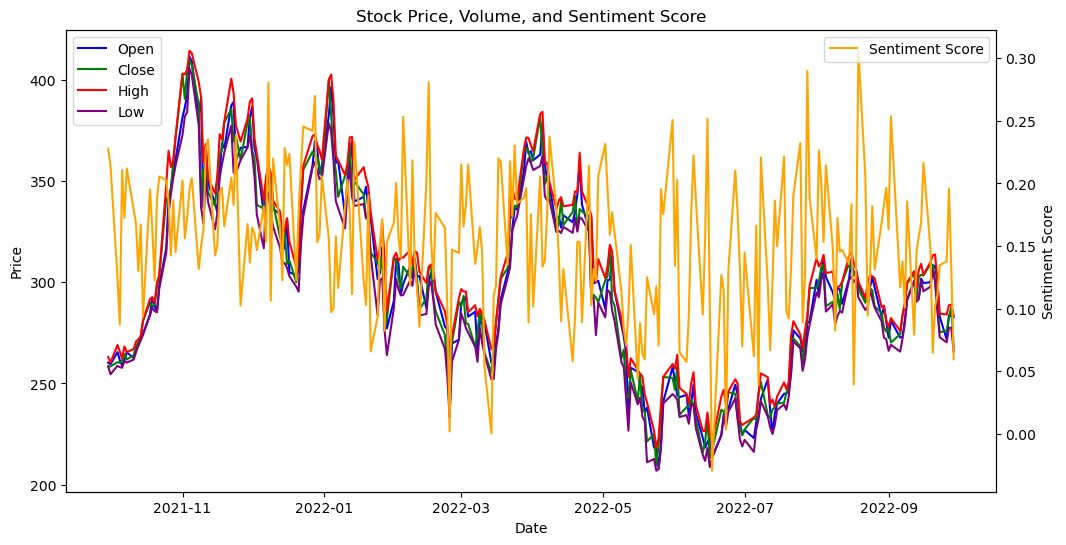

Mean Squared Error: 2067.107648130049
Scores:  [ -0.62949866  -0.6261006   -0.34682793 -35.22939436  -2.80657729]


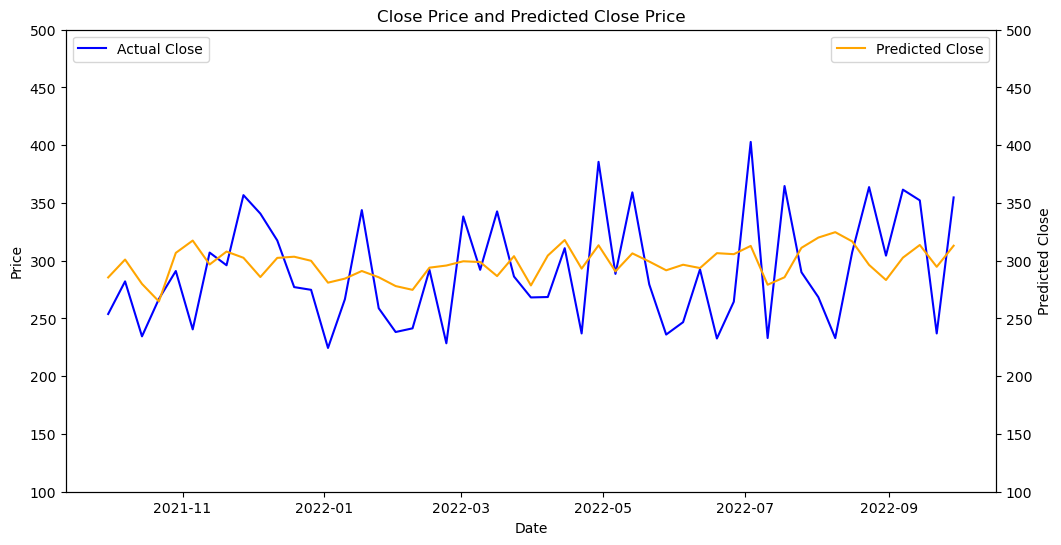

In [42]:
%run ../StockPredictor.ipynb

In [43]:
!pip install keras
!pip install tensorflow
!pip install keras-tuner


In [44]:
# Data = {X_train:, y_train:, y_test:, X_test:}

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
def model_train_eval(model, data, parameters):    
    model_temp=GridSearchCV(model, parameters).fit(data["X_train"], data["y_train"])
    # model_temp=model.fit(data["X_train"], data["y_train"])
    y_pred=model_temp.predict(data["X_test"])
    mse=mean_squared_error(data["y_test"], y_pred)
    print("Mean Squared Error: ", mse)
    total=0
    for i, e in enumerate(y_pred):
        total+=abs((data["y_test"][i]-e)/data["y_test"][i])
    print(f"Mean Absolute Percentage Error: {total/len(y_pred)}")

In [45]:
from sklearn.linear_model import LinearRegression
data={"X_test":X_test, "X_train":X_train, "y_test":y_test, "y_train":y_train}
# The data here needs to be imported from the other data collection notebook
model_train_eval(LinearRegression(), data, {})

Mean Squared Error:  2067.107648130049
Mean Absolute Percentage Error: 0.1354376299317884


In [46]:
from sklearn.neural_network import MLPRegressor
model_train_eval(MLPRegressor(), data, {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
    'activation': ['relu','tanh','logistic'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
})

c:\Users\jlaba\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jlaba\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jlaba\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jlaba\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jlaba\anaconda3\envs\ve

Mean Squared Error:  2045.1008679223414
Mean Absolute Percentage Error: 0.1255897862279939


c:\Users\jlaba\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [47]:
from keras.models import Sequential
import keras_tuner
from keras.layers import LSTM, Dropout, Dense
hp=keras_tuner.HyperParameters()
model=Sequential()
model.add(LSTM(units=hp.Int("units", min_value=32, max_value=512, step=32),return_sequences=True, input_shape=(X_train.shape[1],1), activation=hp.Choice("activation", ["relu", "tanh"])))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error', "mean_absolute_percentage_error"])
model.fit(X_train, y_train, epochs=7500, batch_size=32)
print("yuh")
# y_pred=model.predict(X_test)

Epoch 1/7500
7/7 [==============================] - 7s 7ms/step - loss: 93315.9609 - mean_squared_error: 93315.9609 - mean_absolute_error: 302.1282 - mean_absolute_percentage_error: 99.9968
Epoch 2/7500
7/7 [==============================] - 0s 6ms/step - loss: 93299.0859 - mean_squared_error: 93299.0859 - mean_absolute_error: 302.1001 - mean_absolute_percentage_error: 99.9872
Epoch 3/7500
7/7 [==============================] - 0s 7ms/step - loss: 93276.7734 - mean_squared_error: 93276.7734 - mean_absolute_error: 302.0636 - mean_absolute_percentage_error: 99.9750
Epoch 4/7500
7/7 [==============================] - 0s 8ms/step - loss: 93246.8438 - mean_squared_error: 93246.8438 - mean_absolute_error: 302.0137 - mean_absolute_percentage_error: 99.9580
Epoch 5/7500
7/7 [==============================] - 0s 7ms/step - loss: 93204.8750 - mean_squared_error: 93204.8750 - mean_absolute_error: 301.9438 - mean_absolute_percentage_error: 99.9342
Epoch 6/7500
7/7 [==============================] 

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 32)             4352      
                                                                 
 dropout_4 (Dropout)         (None, 1, 32)             0         
                                                                 
 lstm_5 (LSTM)               (None, 1, 50)             16600     
                                                                 
 dropout_5 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_6 (LSTM)               (None, 1, 50)             20200     
                                                                 
 dropout_6 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

In [49]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

sc=MinMaxScaler(feature_range=(0,1))
sc.fit_transform(X)
booboo=model.predict(X_test)
yuh=mean_squared_error(data["y_test"], booboo)
print(yuh)
len(data["y_test"])
total=0
for i, e in enumerate(booboo):
    total+=abs((data["y_test"][i]-e)/data["y_test"][i])
print(f"MAPE: {total/len(booboo)}")

2/2 [==============================] - 5s 7ms/step
1997.9649516188028
MAPE: [0.13342288]


In [50]:
model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 5s 5s/step - loss: 1997.9651 - mean_squared_error: 1997.9651 - mean_absolute_error: 37.9537 - mean_absolute_percentage_error: 13.3423


[1997.965087890625, 1997.965087890625, 37.95368576049805, 13.342289924621582]

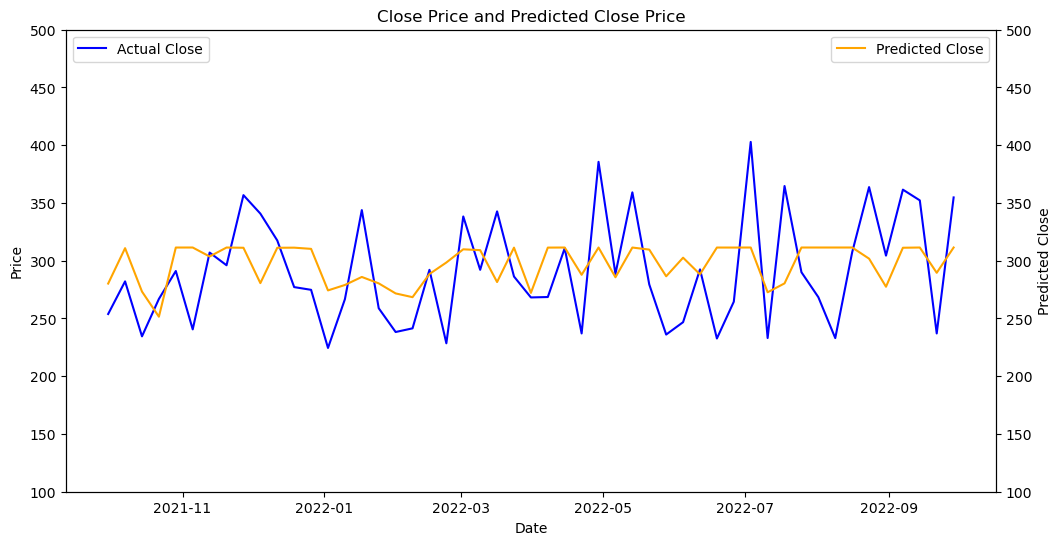

In [51]:
fig, ax1 = plt.subplots(figsize=(12, 6))
date_range = pd.date_range(start=df_merged['Date'].iloc[0], end=df_merged['Date'].iloc[-1], periods=len(y_pred))

# Stock data plot
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.plot(date_range, y_test, label='Actual Close', color='blue')
ax1.legend(loc='upper left')

# Predicted score plot
ax2 = ax1.twinx()
ax2.set_ylabel('Predicted Close')
ax2.plot(date_range, booboo, label='Predicted Close', color='orange')
ax2.legend(loc='upper right')

ax1.set_ylim(100, 500)
ax2.set_ylim(100, 500)

plt.title('Close Price and Predicted Close Price')

plt.show()